In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)


W0822 17:51:46.603608 139803186812544 __init__.py:690] 

  TensorFlow's `tf-nightly` package will soon be updated to TensorFlow 2.0.

  Please upgrade your code to TensorFlow 2.0:
    * https://www.tensorflow.org/beta/guide/migration_guide

  Or install the latest stable TensorFlow 1.X release:
    * `pip install -U "tensorflow==1.*"`

  Otherwise your code may be broken by the change.

  


1.15.0-dev20190821


In [3]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


17465344/17464789 [==============================] - 2s 0us/step


In [4]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))


Training entries: 25000, labels: 25000


In [5]:
print(train_data[0])


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [6]:
len(train_data[0]), len(train_data[1])


(218, 189)

In [8]:
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [9]:
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [10]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [11]:
train_labels[0]

1

In [12]:
decode_review(train_data[1])

"<START> big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal <UNK> the hair is big lots of boobs <UNK> men wear those cut <UNK> shirts that show off their <UNK> sickening that men actually wore them and the music is just <UNK> trash that plays over and over again in almost every scene there is trashy music boobs and <UNK> taking away bodies and the gym still doesn't close for <UNK> all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

In [13]:
train_labels[1]

0

In [15]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [16]:
len(train_data[0]), len(train_data[1])

(256, 256)

In [19]:
print(train_data[3])

[1784   86 1117    8 3261   46   11    2   21   29    9 2841   23    4
 1010    2  793    6    2 1386 1830   10   10  246   50    9    6 2750
 1944  746   90   29    2    8  124    4  882    4  882  496   27    2
 2213  537  121  127 1219  130    5   29  494    8  124    4  882  496
    4  341    7   27  846   10   10   29    9 1906    8   97    6  236
    2 1311    8    4    2    7   31    7    2   91    2 3987   70    4
  882   30  579   42    9   12   32   11  537   10   10   11   14   65
   44  537   75    2 1775 3353    2 1846    4    2    7  154    5    4
  518   53    2    2    7 3211  882   11  399   38   75  257 3807   19
    2   17   29  456    4   65    7   27  205  113   10   10    2    4
    2    2    9  242    4   91 1202    2    5 2070  307   22    7 5168
  126   93   40    2   13  188 1076 3222   19    4    2    7 2348  537
   23   53  537   21   82   40    2   13    2   14  280   13  219    4
    2  431  758  859    4  953 1052    2    7 5991    5   94   40   25
  238 

In [23]:
vocab_size = 10000
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_3 ( (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['acc'])

W0822 19:50:46.625624 139803186812544 deprecation.py:323] From /home/fabrice/.local/lib/python3.7/site-packages/tensorflow_core/python/ops/nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [26]:
x_validation = train_data[:10000]
partial_x_train = train_data[10000:]

y_validation = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [27]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=40,
                   batch_size=512,
                   validation_data=(x_validation, y_validation),
                   verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 44us/sample - loss: 0.6917 - acc: 0.5115 - val_loss: 0.6894 - val_acc: 0.5383
Epoch 2/40
15000/15000 [==============================] - 1s 35us/sample - loss: 0.6849 - acc: 0.6738 - val_loss: 0.6804 - val_acc: 0.6977
Epoch 3/40
15000/15000 [==============================] - 0s 32us/sample - loss: 0.6710 - acc: 0.7295 - val_loss: 0.6633 - val_acc: 0.7376
Epoch 4/40
15000/15000 [==============================] - 1s 36us/sample - loss: 0.6472 - acc: 0.7471 - val_loss: 0.6363 - val_acc: 0.7632
Epoch 5/40
15000/15000 [==============================] - 1s 38us/sample - loss: 0.6125 - acc: 0.7836 - val_loss: 0.6006 - val_acc: 0.7838
Epoch 6/40
15000/15000 [==============================] - 0s 33us/sample - loss: 0.5692 - acc: 0.8117 - val_loss: 0.5593 - val_acc: 0.8006
Epoch 7/40
15000/15000 [==============================] - 0s 31us/sample - loss: 0.5212 - acc: 0.8309 - val_loss: 0.

In [28]:
results = model.evaluate(test_data, test_labels)

print(results)

25000/25000 [==============================] - 1s 21us/sample - loss: 0.3442 - acc: 0.8698
[0.34417985602855683, 0.86984]


In [29]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [31]:
import matplotlib.pyplot as plt

In [33]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc)+1)

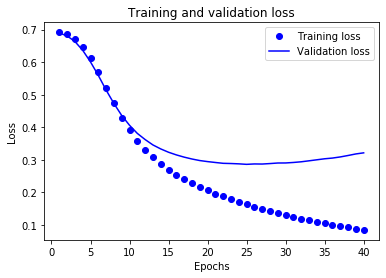

In [34]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

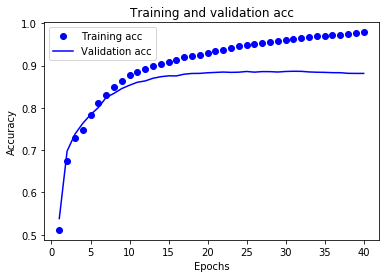

In [35]:
plt.clf()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
